# Full Adder: Definition and Equation
- A full adder is a combinational logic circuit that adds three binary numbers (A, B, and Cin) and outputs a sum (S) and a carry-out (Cout). The full adder allows for the addition of multi-bit binary numbers by cascading multiple full adders together.

## Full Adder Equation
The full adder has three inputs (A, B, and Cin) and two outputs (Sum and Cout). The equations for the outputs are as follows:

- $ \huge Sum (S) =     $  $\huge A ⊕ B⊕ Cin $



- $ \huge C_{out}  =     $  $\huge (A⋅B)+(Cin⋅(A⊕B)) $


Here, 
- $ \huge ⊕ $ denotes the XOR operation, and 
- $ \huge ⋅ $ denotes the AND operation.

# Full Adder Logic Circuit
- A full adder can be implemented using basic logic gates (AND, OR, XOR).


## Sum (S):
- First, compute $ \huge A⊕B $.


- Then, compute $ \huge (A⊕B)⊕Cin $.

## Carry-out (Cout):
- First, compute ,$ \huge A⋅B $.
- Then, compute $ \huge Cin⋅(A⊕B) $.


- Finally, compute the OR of the two intermediate carry values: 
- $ \huge (A⋅B)+(Cin⋅(A⊕B)). $

In [50]:
import streamlit as st
import matplotlib.pyplot as plt
import networkx as nx

# Define the logic gates
def AND(a, b):
    return a & b

def OR(a, b):
    return a | b

def XOR(a, b):
    return a ^ b

# Define the full adder logic
def full_adder(a, b, carry_in):
    sum_ = XOR(XOR(a, b), carry_in)
    carry_out = OR(AND(a, b), AND(XOR(a, b), carry_in))
    return sum_, carry_out


In [54]:
# Full adder dataframe Generation
import pandas as pd

# Define the logic gates
def AND(a, b):
    return a & b

def OR(a, b):
    return a | b

def XOR(a, b):
    return a ^ b

# Define the full adder logic
def full_adder(a, b, carry_in):
    sum_ = XOR(XOR(a, b), carry_in)
    carry_out = OR(AND(a, b), AND(XOR(a, b), carry_in))
    return sum_, carry_out

# Generate all possible combinations of inputs
data = []
for a in [0, 1]:
    for b in [0, 1]:
        for carry_in in [0, 1]:
            sum_, carry_out = full_adder(a, b, carry_in)
            data.append([a, b, carry_in, sum_, carry_out])

# Create a DataFrame
columns = ['A', 'B', 'Cin', 'Sum', 'Cout']
df = pd.DataFrame(data, columns=columns)

In [56]:
df

,A,B,Cin,Sum,Cout
0,0,0,0,0,0
1,0,0,1,1,0
2,0,1,0,1,0
3,0,1,1,0,1
4,1,0,0,1,0
5,1,0,1,0,1
6,1,1,0,0,1
7,1,1,1,1,1


In [58]:
# Function to plot the DataFrame
def plot_full_adder(df):
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    return fig

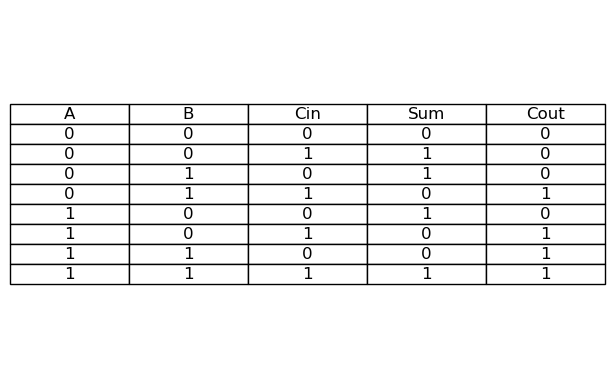

In [60]:
plot_full_adder(df)

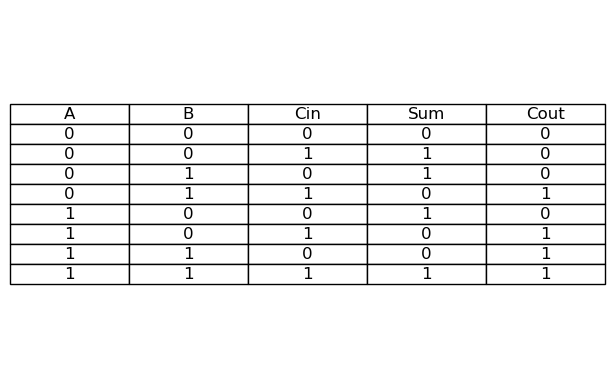

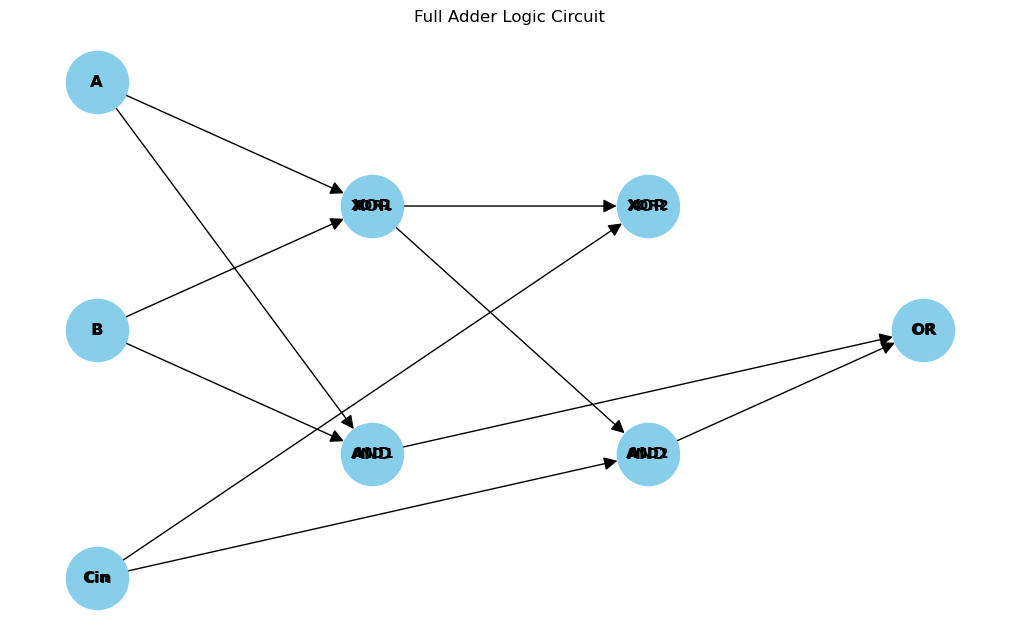

In [62]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for inputs
G.add_node('A', label='A', pos=(0, 1))
G.add_node('B', label='B', pos=(0, 0))
G.add_node('Cin', label='Cin', pos=(0, -1))

# Add nodes for gates
G.add_node('XOR1', label='XOR', pos=(1, 0.5))
G.add_node('XOR2', label='XOR', pos=(2, 0.5))
G.add_node('AND1', label='AND', pos=(1, -0.5))
G.add_node('AND2', label='AND', pos=(2, -0.5))
G.add_node('OR', label='OR', pos=(3, 0))

# Add edges for connections
G.add_edge('A', 'XOR1')
G.add_edge('B', 'XOR1')
G.add_edge('XOR1', 'XOR2')
G.add_edge('Cin', 'XOR2')

G.add_edge('A', 'AND1')
G.add_edge('B', 'AND1')
G.add_edge('XOR1', 'AND2')
G.add_edge('Cin', 'AND2')

G.add_edge('AND1', 'OR')
G.add_edge('AND2', 'OR')

# Define positions for nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True, arrowsize=20)

# Draw node labels
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='black', font_size=12, font_weight='bold')

plt.title("Full Adder Logic Circuit")
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Define the logic gates
def AND(a, b):
    return a & b

def OR(a, b):
    return a | b

def XOR(a, b):
    return a ^ b

# Define the full adder logic
def full_adder(a, b, carry_in):
    sum_ = XOR(XOR(a, b), carry_in)
    carry_out = OR(AND(a, b), AND(XOR(a, b), carry_in))
    return sum_, carry_out

# Generate all possible combinations of inputs
data = []
for a in [0, 1]:
    for b in [0, 1]:
        for carry_in in [0, 1]:
            sum_, carry_out = full_adder(a, b, carry_in)
            data.append([a, b, carry_in, sum_, carry_out])

# Create a DataFrame
columns = ['A', 'B', 'Cin', 'Sum', 'Cout']
df = pd.DataFrame(data, columns=columns)

# Split the data into features and labels
X = df[['A', 'B', 'Cin']]
y_sum = df['Sum']
y_cout = df['Cout']

# Split into train and test sets
X_train, X_test, y_train_sum, y_test_sum = train_test_split(X, y_sum, test_size=0.2, random_state=42)
_, _, y_train_cout, y_test_cout = train_test_split(X, y_cout, test_size=0.2, random_state=42)

# Train the models
model_sum = RandomForestClassifier(random_state=42)
model_cout = RandomForestClassifier(random_state=42)

model_sum.fit(X_train, y_train_sum)
model_cout.fit(X_train, y_train_cout)

# Evaluate the models
y_pred_sum = model_sum.predict(X_test)
y_pred_cout = model_cout.predict(X_test)

accuracy_sum = accuracy_score(y_test_sum, y_pred_sum)
accuracy_cout = accuracy_score(y_test_cout, y_pred_cout)

print(f"Accuracy for Sum model: {accuracy_sum:.2f}")
print(f"Accuracy for Cout model: {accuracy_cout:.2f}")




Accuracy for Sum model: 0.00
Accuracy for Cout model: 1.00


['model_cout.pkl']

In [5]:
import pickle
pickle.dump(model_sum,open("sum.pkl","wb"))
model1=pickle.load(open("sum.pkl","rb"))
model1

RandomForestClassifier(random_state=42)

In [7]:
pickle.dump(model_cout,open("Cout.pkl","wb"))
model2=pickle.load(open("Cout.pkl","rb"))
model2

RandomForestClassifier(random_state=42)